If you're reading this, you have just begun your pocket-sized journey into machine learning topics. As with any field, you must start at the basics, and that is where you are now. Unfortunately, in this case, the basics aren't so basic.

For most people (myself included), probability is one of the hardest concepts to grasp out of all of the mathematical disciplines. Most of the ideas are algebraically and computationally simple, but can be a conceptual nightmare. My only goal for this post is to form a *basic* layer of understanding with which you can use as a foundation for all of your future endeavours in machine learning.

We will start with basic probability.

---

# Basic Probability

We'll start with some terminology.

- The set of all possible outcomes is called the ***sample space***, and is usually given the symbol $S$.
- The probability of a ***event***, $A$, occurring can be calculated by taking the ratio of the cardinalities of the event and the sample space, $P(A) = \frac{\left| A \right|}{\left| S \right|}$.

There were a lot of big words in there, so let's take a look at an example. Imagine rolling a fair six-sided die. There are six equally likely possible outcomes: 1, 2, 3, 4, 5, 6. Therefore, since there are no other possible outcomes, then we have our sample space:

$$S = \{ 1, 2, 3, 4, 5, 6 \}$$

Now, let's describe an "event". We will call $A$ the event where we roll an even number. Then we can write:

$$A = \{ 2, 4, 6 \}$$

Now look at the third rule again. The symbols and big words may look complicated, but "taking the ratio of the cardinalities of the event and the sample space" really just means counting up the number of elements in our event and dividing it by the total number of possible elements. In our case, there are three possible even numbers, and six possible total numbers, so:

$$P(A) = \frac{\left| A \right|}{\left| S \right|} = \frac{3}{6} = \frac{1}{2} = 0.5 = 50\%$$

This should be making sense so far. There are a few other things we can deduce from this simple equation too. Let's calculate the probability of the sample space:

$$P(S) = \frac{\left| S \right|}{\left| S \right|} = \frac{6}{6} = 1 = 100\%$$

This should also make sense. The probability of *any* of the possible values occurring should be guaranteed. What about a set with nothing in it? We'll call that set $B$:

$$B = \{\}$$

Then the probability of $B$ occuring is:

$$P(B) = \frac{\left| B \right|}{\left| S \right|} = \frac{0}{6} = 0$$

Which also makes sense. This gives us insight into the range of values that a probability should be able to take:

$$0 \leq P(A) \leq 1$$

This goes for all scenarios; not just for the die example.

---

# Probability of This and That

Let's extend our example by imagining that we roll two dice, one by one. The first roll can take on any one of six values, and the second one can take on six different values for each of the six values that the first roll could have taken. This gives us $6 \times 6 = 36$ different possible outcomes. Let's write our sample space like this:

$$S = \{ (1, 1), (1, 2), (1, 3) \ldots (6, 5), (6, 6) \}$$

What is the probability of the first roll being a $2$? Let's write the set for the event of all combinations of rolls where the first roll is a $2$:

$$A = \{ (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6) \}$$

And finally:

$$P(A) = \frac{\left| A \right|}{\left| S \right|} = \frac{6}{36} = \frac{1}{6} \approx 16.67\%$$

Let's try another probability. This time we ask ourselves, "what's the probability that our second roll is $5$"? Well, this set is very similar to the previous one:

$$B = \{ (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5) \}$$

And the probability is identical:

$$P(B) = \frac{\left| B \right|}{\left| S \right|} = \frac{6}{36} = \frac{1}{6} \approx 16.67\%$$

Last example! What's the probability that the first roll is $2$, ***and*** that our second roll is $5$? Well, this set is pretty simple:

$$C = \{ (2, 5) \}$$

So our probability is:

$$P(C) = \frac{\left| B \right|}{\left| S \right|} = \frac{1}{36} \approx 2.78\%$$

This is correct, but we have a more powerful technique up our sleeve. In order to find it, let's look at a visual representation of our example:

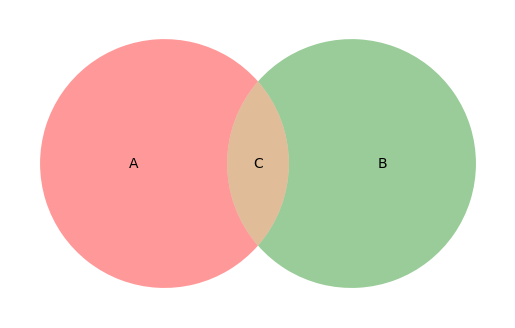

In [2]:
#| echo: false
#| fig-align: center

import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

v = venn2(subsets = (6, 6, 1))
v.get_label_by_id('100').set_text('A')
v.get_label_by_id('010').set_text('B')
v.get_label_by_id('110').set_text('C')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
plt.show()

The red circle on the left represents all outcomes in the $A$ event, and the green circle on the right represents all outcomes in the $B$ event. Notice that the intersection of these two regions shows the outcome for event $C$.

There are two main operations when it comes to sets that are very useful for determining more advanced probabilities.

- Union
- Intersection

The ***union***, given the symbol $\cup$, is defined as the set of all events that both $A$ and $B$ contain. In the case of our picture, this is what the union looks like:

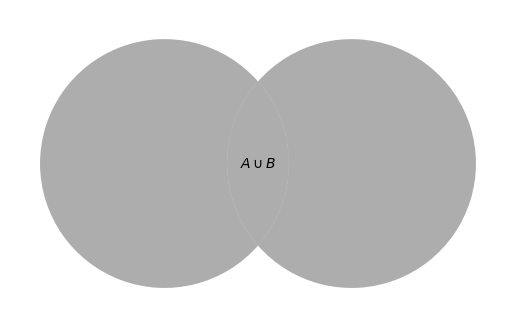

In [79]:
#| echo: false
#| fig-align: center

v = venn2(subsets = (6, 6, 1))
v.get_label_by_id('100').set_text('')
v.get_patch_by_id('100').set_color('#333333')
v.get_patch_by_id('100').set_edgecolor('none')
v.get_label_by_id('010').set_text('')
v.get_patch_by_id('010').set_color('#333333')
v.get_patch_by_id('010').set_edgecolor('none')
v.get_label_by_id('110').set_text('$A \cup B$')
v.get_patch_by_id('110').set_color('#333333')
v.get_patch_by_id('110').set_edgecolor('none')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
c = venn2_circles(subsets=(6, 6, 1))
c[0].set_lw(0)
c[1].set_lw(0)
plt.show()

Conversely, the ***intersection***, given the symbol $\cap$, gives the set of outcomes that $A$ and $B$ *share*. Here is the diagram:

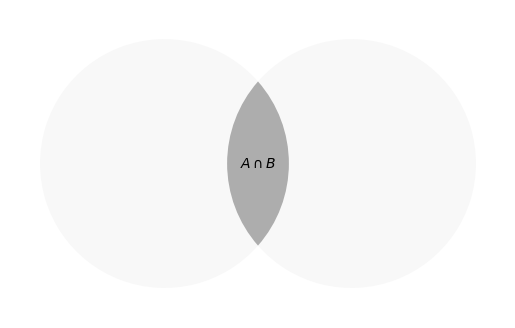

In [83]:
#| echo: false
#| fig-align: center

v = venn2(subsets = (6, 6, 1))
v.get_label_by_id('100').set_text('')
v.get_patch_by_id('100').set_color('#EEEEEE')
v.get_patch_by_id('100').set_edgecolor('none')
v.get_label_by_id('010').set_text('')
v.get_patch_by_id('010').set_color('#EEEEEE')
v.get_patch_by_id('010').set_edgecolor('none')
v.get_label_by_id('110').set_text('$A \cap B$')
v.get_patch_by_id('110').set_color('#333333')
v.get_patch_by_id('110').set_edgecolor('none')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
c = venn2_circles(subsets=(6, 6, 1))
c[0].set_lw(0)
c[1].set_lw(0)
plt.show()

You can think of it this way:

- $A \cup B = A~\mathrm{or}~B$
- $A \cap B = A~\mathrm{and}~B$

But why is this useful? Well, there's a really cool relationship that we can derive between the two of them just using the information so far. Here's how we do it.

Imagine taking the individual probabilities of $A$ and $B$ and adding them together. In doing this, you'd have calculated the probability of the union of the two events, plus a little extra. This little extra comes from the fact that both sets contain their intersection, so you counted the intersection twice on accident. The first copy contributed to the union of the two sets, the second copy is the "little extra". In other words:

$$P(A) + P(B) = P(A \cup B) + P(A \cap B)$$

We can rearrange this equation to get our desired result:

$$P(A \cap B) = P(A) + P(B) - P(A \cup B)$$

Let's use this equation to recalculate the probability of $C$ again. That is, let's calculate the probability that the first roll is $2$ and that the second roll is $5$.

First, we need to find $A \cup B$. Remember, this is the same as asking for all outcomes where the first number is $2$ ***or*** that the second number is $5$. We can take all of the individual elements from $A$ and be $B$ independently (making sure not to double count any) and place them together:

$$A \cup B = \{ (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (1, 5), (3, 5), (4, 5), (5, 5), (6, 5) \}$$

*Notice that $(2, 5)$ appears in both sets, but we only count it once.*

Let's get this probability:

$$P(A \cup B) = \frac{\left| A \cup B \right|}{\left| S \right|} = \frac{11}{36} \approx 30.56\%$$

Now we can get to calculating!

$$\begin{equation}
\begin{split}
P(C) = P(A \cap B) &= P(A) + P(B) - P(A \cup B)\\
&= \frac{1}{6} + \frac{1}{6} - \frac{11}{36}\\
&= \frac{1}{36} \approx 2.78\%
\end{split}
\end{equation}$$

Exactly the same as last time!

This process may seem far more cumbersome than the original calculation, but as the sets of events start increasing in size, it is **much** easier to know how to calculate probabilities of intersections of events from other probabilities as opposed to actually counting it out.

---

# Conditional Probability

Let's extend our example by imagining that we roll the same die five times. The die is still fair, and takes on one of six values every roll. We will then track the total sum of all the rolls. For example, if the values that appeared during the rolls were $1, 4, 3, 6, 2$, the total would be $1 + 4 + 3 + 6 + 2 = 16$. 

Before we get started, let's analyze what we know right away. We know that the total number of possible rolls is $6^5 = 7,776$. We also know that the lowest sum possible is $1 + 1 + 1 + 1 + 1 = 5$, and the highest is $6 + 6 + 6 + 6 + 6 = 30$. These both occur only once, since they only have one set of numbers that can provide that sum. Conversely, other sums will occur far more often. For example, imagine a sum where all the rolls are different numbers: $1 + 2 + 3 + 4 + 5 = 15$. Since these rolls could have happened in any order, and there are $5! = 5 \times 4 \times 3 \times 2 \times 1 = 120$ different possible orderings, then the chances of getting a sum of $15$ is much higher than getting a sum of $5$ or $30$. 

This gives us insight that the distribution of outcomes is going to be most common near the average roll value ($\frac{30 + 5}{2} = 17.5$), since there are far more ways of arranging the sums, than at the low or high extremes. Let's look at the graph of the rolls:

Text(0, 0.5, 'Number of Occurrences')

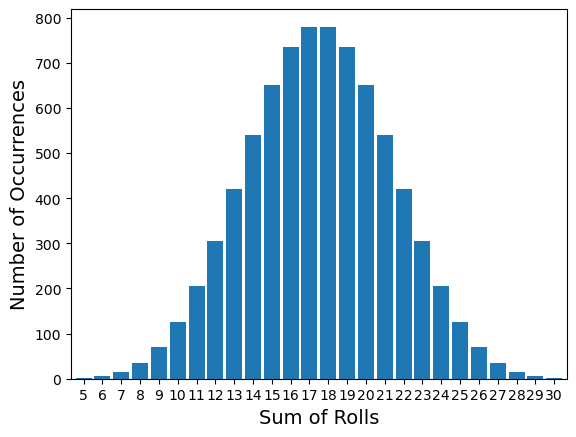

In [32]:
#| code-fold: true
#| fig-align: center

allRolls = []

currRoll = [1, 1, 1, 1, 1]
for a in range(1, 7):
    currRoll[0] = a
    for b in range(1, 7):
        currRoll[1] = b
        for c in range(1, 7):
            currRoll[2] = c
            for d in range(1, 7):
                currRoll[3] = d
                for e in range(1, 7):
                    currRoll[4] = e
                    allRolls.append(currRoll.copy())
                    
allRollSums = [sum(roll) for roll in allRolls]

sumValues = list(range(5, 30 + 1))
sumCounts = [allRollSums.count(value) for value in sumValues]

import pandas as pd
import matplotlib.ticker as mtick

df = pd.DataFrame(sumCounts, sumValues)

df.plot.bar(rot=0, width=0.85, legend=False)
plt.xlabel("Sum of Rolls")
plt.ylabel("Number of Occurrences")

Just as we predicted. This graph is a great example of a ***Gaussian Distribution***. Let's divide each of the individual "number of occurrences" values by the total number of possible rolls ($7,776$) to get the probability of getting each sum:

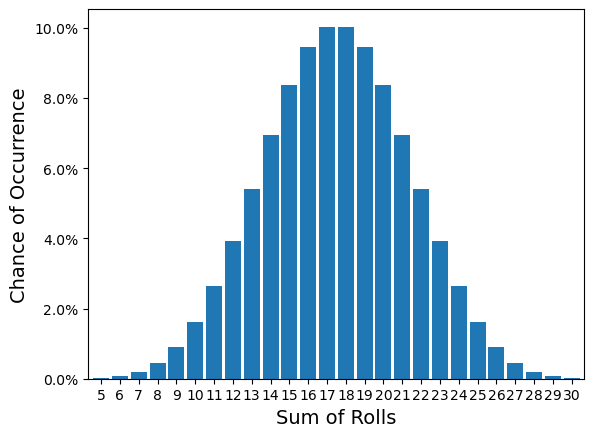

In [35]:
#| code-fold: true
#| fig-align: center

normalizedSumCounts = [count / sum(sumCounts) for count in sumCounts]
df = pd.DataFrame(normalizedSumCounts, sumValues)
ax = df.plot.bar(rot=0, width=0.85, legend=False)
plt.xlabel("Sum of Rolls")
plt.ylabel("Chance of Occurrence")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

Very nice. We can see that getting a sum of around $17$ or $18$ will happen in about $1$ in every $10$ rolls, while getting a sum of $5$ or $30$ is not probable at all ($\frac{1}{7776} \approx 0.0129\%$).

We can also find the probability of obtaining a *range* of values very easily. All we have to do is add the probability of obtaining each sum within the range. For example, the probability of getting a sum between $16$ and $19$ (inclusive) would be:

$$\begin{equation}
\begin{split}
P\left(16 \leq \sum_{i=1}^{5}x_i \leq 19\right) &= P(16 \leq x_1 + x_2 + x_3 + x_4 + x_5 \leq 19)\\
&= P(16) + P(17) + P(18) + P(19)
\end{split}
\end{equation}$$

In [74]:
#| code-fold: true

sumRange = range(16, 19 + 1)
sumRangeProbs = [normalizedSumCounts[sumValues.index(value)] for value in sumValues if value in sumRange]
print("{}%".format(round(sum(sumRangeProbs * 100), 2)))

38.97%


Neat! This shows that more than a third of all of the sums of five rolls will be somewhere between $16$ and $19$.

This has led us to one of the most important parts of probability. Let's ask a much more interesting and insightful question: what is the probability that the sum will be between $16$ and $19$ ***given that the first three rolls add up to*** $14$? At first glance, this question may seem to have the same answer as the previous question. After all, why should the knowledge of our first three rolls affect the outcome? Well, as it turns out, this new information essentially excludes sequences of rolls that we would have otherwise considered. To understand how to solve this, let's look at a graphical representation again:

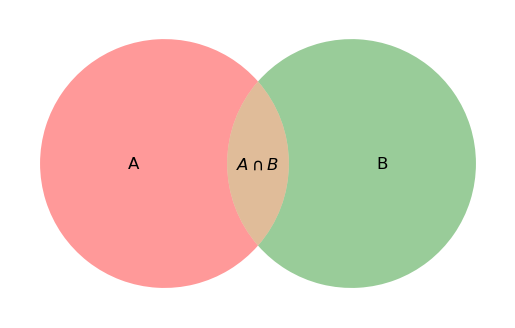

In [76]:
#| echo: false
#| fig-align: center

v = venn2(subsets = (6, 6, 1))
v.get_label_by_id('100').set_text('A')
v.get_label_by_id('010').set_text('B')
v.get_label_by_id('110').set_text('$A \cap B$')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
plt.show()

The probability for of an event occurring ***given another event*** is written as $P(\mathrm{Event~1} | \mathrm{Event~2})$. For example, the probability of $A$ given $B$ is $P(A|B)$.

Determining a relationship for this is not hard. We are essentially asking, "what is the probability of $A$ being true, given that $B$ is also true?" We know that a typical probability is the ratio of the number of occurrences of that event to the number of possible occurrences: $P(A) = \frac{\left| A \right|}{\left| S \right|}$. However, in this case, the event we're concerned with is the *intersection* of two events (since both $A$ and $B$ are true), so the numerator should be the number of occurrences of the intersection, $\left| A \cap B \right|$. The other difference is, ***the number of possible occurrences is no longer the sample space***. Instead, it is the ***number of occurrences of the second event***, $\left| B \right|$. Let's visualize this:

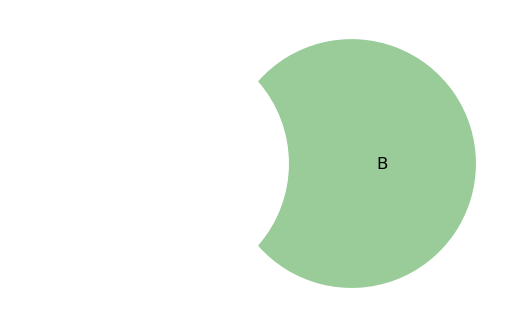

In [81]:
#| echo: false
#| fig-align: center

v = venn2(subsets = (6, 6, 1))
v.get_label_by_id('100').set_text('')
v.get_patch_by_id('100').set_color('#FFFFFF')
v.get_patch_by_id('100').set_edgecolor('none')
v.get_label_by_id('010').set_text('B')
v.get_patch_by_id('010').set_color('green')
v.get_patch_by_id('010').set_edgecolor('none')
v.get_label_by_id('110').set_text('')
v.get_patch_by_id('110').set_color('#FFFFFF')
v.get_patch_by_id('110').set_edgecolor('none')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
c = venn2_circles(subsets=(6, 6, 1))
c[0].set_lw(0)
c[1].set_lw(0)
plt.show()

Here is a visual representation of the events where $B$ is true, but $A$ is *not* true. This can be written as $B \cap \neg A$, where the $\neg$ symbol means "not". Now, let's reinclude the intersection of $A$ and $B$:

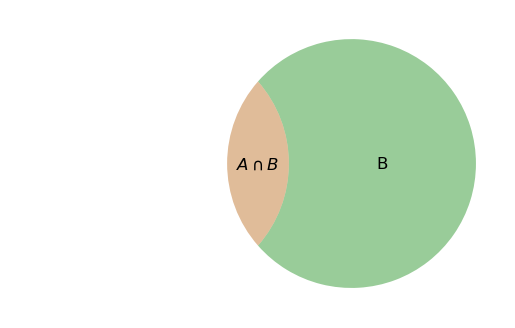

In [90]:
#| echo: false
#| fig-align: center

v = venn2(subsets = (6, 6, 1))
v.get_label_by_id('100').set_text('')
v.get_patch_by_id('100').set_color('#FFFFFF')
v.get_patch_by_id('100').set_edgecolor('none')
v.get_label_by_id('010').set_text('B')
v.get_patch_by_id('010').set_color('green')
v.get_patch_by_id('010').set_edgecolor('none')
v.get_label_by_id('110').set_text('$A \cap B$')
v.get_patch_by_id('110').set_edgecolor('none')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
c = venn2_circles(subsets=(6, 6, 1))
c[0].set_lw(0)
c[1].set_lw(0)
plt.show()

Now we have visually represented the question, "what is the chance that $A$ is true, given that $B$ is also true?" We know that this probability should be the number of cases where both $A$ and $B$ are true, divided by all of the cases where $B$ is true. Another way of thinking about this is that $B$ has essentially become a "new sample space", and $P(A \cap B)$ is what we're trying to calculate. Visually:

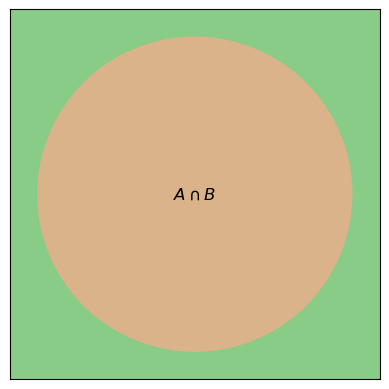

In [121]:
#| echo: false
#| fig-align: center

v = venn2(subsets = (0, 0, 3), alpha=1)
v.get_label_by_id('100').set_text('')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('110').set_text('$A \cap B$')
v.get_patch_by_id('110').set_color('#dbb38a')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
plt.gca().set_facecolor('#88CC88')
plt.gca().set_axis_on()
plt.show()

So our equation is:

$$P(A|B) = \frac{\left| A \cap B \right|}{\left|B \right|}$$

Let's do some algebraic magic:

$$P(A|B) = \frac{\left| A \cap B \right|}{\left|B \right|} \times \frac{\frac{1}{\left| S \right|}}{\frac{1}{\left| S \right|}} = \frac{\frac{\left| A \cap B \right|}{\left| S \right|}}{\frac{\left| B \right|}{\left| S \right|}} = \frac{P(A \cap B)}{P(B)}$$

So now we can firmly state that the problem of $A$ given $B$ is equal to the probability of $A$ *and* $B$, divided by the probability of $B$:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Let's apply this to the original question: "what is the probability that the sum will be between $16$ and $19$ given that the first three rolls add up to $14$?":

$$P\left(16 \leq \left.\sum_{i=1}^{5}x_i \leq 19 \right| \sum_{i=1}^{3}x_i = 14\right) = \frac{P\left(16 \leq \sum\limits_{i=1}^{5}x_i \leq 19~\mathrm{and}~\sum\limits_{i=1}^{3}x_i = 14\right)}{P\left(\sum\limits_{i=1}^{3}x_i = 14\right)}$$

In [138]:
#| echo: false

firstThreeRollSums = [sum(roll) for roll in allRolls if roll[0] + roll[1] + roll[2] == 14]
firstThreeRollSumsInRange = [rollSum for rollSum in firstThreeRollSums if rollSum >= 16 and rollSum <= 19]

print("{}%".format(round((len(firstThreeRollSumsInRange) / len(firstThreeRollSums)) * 100, 2)))

27.78%


So, as it turns out, if your first three rolls sum to a $14$, you have slightly more than a one in four chance to have a total sum between $16$ and $19$. Just for fun, let's plot the conditional probability of rolling between $16$ and $19$ given different sums for the first three rolls:

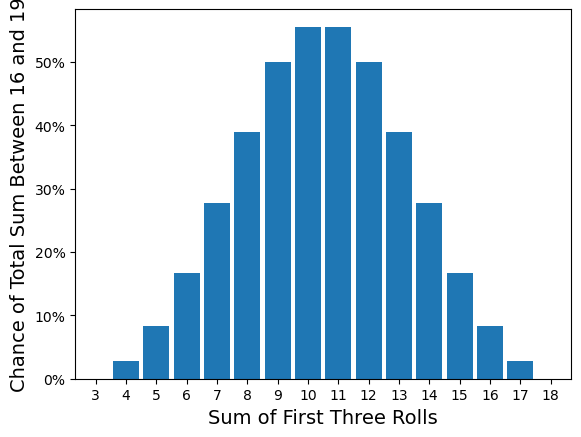

In [135]:
#| code-fold: true
#| fig-align: center

firstThreeSum = range(3, 18 + 1)
chances = []
for i in firstThreeSum:
    firstThreeRollSums = [sum(roll) for roll in allRolls if roll[0] + roll[1] + roll[2] == i]
    firstThreeRollSumsInRange = [roll for roll in firstThreeRollSums if roll >= 16 and roll <= 19]
    chances.append(len(firstThreeRollSumsInRange) / len(firstThreeRollSums))

df = pd.DataFrame(chances, firstThreeSum)
ax = df.plot.bar(rot=0, width=0.85, legend=False)
plt.xlabel("Sum of First Three Rolls")
plt.ylabel("Chance of Total Sum Between 16 and 19")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

We can see that if the first three rolls sum to $3$, even the highest values for the other rolls can't reach the range: $1 + 1 + 1 + 6 + 6 = 15 < 16$. This applies to $18$ as well: $6 + 6 + 6 + 1 + 1 = 20 > 19$. As it turns out, the sums of the first three values that gives you the highest chances of rolling within the range are $10$ and $11$. 

Funnily enough, if your first three rolls sum to $9$ or $12$, your chances of landing in the range are **exactly** $50\%$. Another quirk is that if your first three rolls sum to $8$ or $13$, your chances of landing in the range is $38.89\%$, which is almost identical to the original chance of rolling within the range, $P(A)$!

---

# Bayes' Rule

We have now entered the final (and most important) section. All of the previous knowledge has been building up to this point.\

Let's examine the conditional probability equation again:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can rearrange it like so:

$$P(A \cap B) = P(A|B)P(B)$$

At this point, we can note that $P(A \cap B) = P(B \cap A)$, since the intersection of the two sets remains the same regardless of order. Let's examine the conditional probability using this order:

$$P(B \cap A) = P(B|A)P(A)$$

Since $P(A \cap B) = P(B \cap A)$, then the right sides of each of the equations should be equal to each other:

$$P(A|B)P(B) = P(B|A)P(A)$$

And we can rearrange once more to give:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

This is known as ***Bayes' Rule***, and is one of the most important machine learning concepts. It shows that there is a fundamental relationship between conditional probabilities with different orderings. What's amazing about this relationship is that no assumptions have been made; this is true for all probabilities.

To demonstrate this, we will use a real dataset. This dataset comes from U.S. census reports from 2011 to 2015, and gives information about household income along with location, state, zip code, etc. It was downloaded from [Kaggle](https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations/data). Let's visualize the first few data points:

In [229]:
df = pd.read_csv('kaggle_income.csv', encoding='windows-1252')
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


There's quite a bit of data here to look at. Let's see if we can plot this somehow:

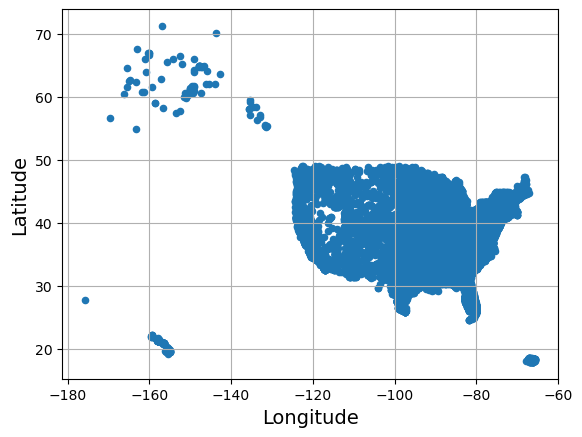

In [231]:
#| fig-align: center

df.plot(kind="scatter", x="Lon", y="Lat", grid=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

We can clearly see that this dataset has data from Alaska, Hawaii, and even Puerto Rico. We can see all the different parameters and their data types here:

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32526 entries, 0 to 32525
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32526 non-null  int64  
 1   State_Code  32526 non-null  int64  
 2   State_Name  32526 non-null  object 
 3   State_ab    32526 non-null  object 
 4   County      32526 non-null  object 
 5   City        32526 non-null  object 
 6   Place       32526 non-null  object 
 7   Type        32526 non-null  object 
 8   Primary     32526 non-null  object 
 9   Zip_Code    32526 non-null  int64  
 10  Area_Code   32526 non-null  object 
 11  ALand       32526 non-null  int64  
 12  AWater      32526 non-null  int64  
 13  Lat         32526 non-null  float64
 14  Lon         32526 non-null  float64
 15  Mean        32526 non-null  int64  
 16  Median      32526 non-null  int64  
 17  Stdev       32526 non-null  int64  
 18  sum_w       32526 non-null  float64
dtypes: float64(3), int64(8), 

For the object types, we can see what different values they can take like this:

In [233]:
df["State_Name"].value_counts()

State_Name
California              3280
Texas                   2300
New York                2160
Florida                 1661
Pennsylvania            1475
Illinois                1431
Ohio                    1349
Michigan                1174
North Carolina           915
New Jersey               888
Georgia                  818
Virginia                 785
Indiana                  704
Missouri                 700
Washington               688
Wisconsin                674
Massachusetts            670
Minnesota                641
Arizona                  617
Tennessee                610
Maryland                 586
Alabama                  526
Colorado                 526
Louisiana                511
Kentucky                 497
Oklahoma                 480
South Carolina           459
Iowa                     454
Oregon                   387
Kansas                   381
Puerto Rico              380
Connecticut              355
Arkansas                 340
Mississippi              321
Neb

California has the highest number of data points (no surprise there), while D.C. has the fewest. Now that we've had a look around, let's focus on Virginia:

In [296]:
#| fig-align: center

virginia = df.copy()
virginia = virginia.drop(["id", "State_Code", "Zip_Code", "State_ab", "Area_Code", "ALand", "AWater"], axis=1)
virginia = virginia[virginia["State_Name"] == "Virginia"]
virginia = virginia[virginia["Type"] == "Track"]
virginia.describe()

,Lat,Lon,Mean,Median,Stdev,sum_w
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,37.751752,-77.849723,79952.308011,105208.250000,51075.248619,434.758474
std,0.835956,1.512712,39089.677211,95940.593647,16825.048860,358.204421
min,36.581972,-83.106093,0.000000,0.000000,0.000000,0.000000
25%,36.983112,-78.518816,52039.500000,41727.250000,39309.500000,201.326579
50%,37.519565,-77.420987,70964.500000,63942.000000,51219.500000,327.972570
75%,38.736408,-77.057345,101269.000000,119256.250000,64484.250000,511.870572
max,39.345172,-75.503313,205835.000000,300000.000000,94395.000000,2328.854201


I took the liberty of removing some of the information that I'm not planning on using, such as the state abbreviations, zip codes, and others. I also narrowed the location types to "Track" since it is the most narrow result you can get in this dataset. 

We can see some important values, like the maximum and minimum values for housing number and average household income. Let's plot this to get a better look:

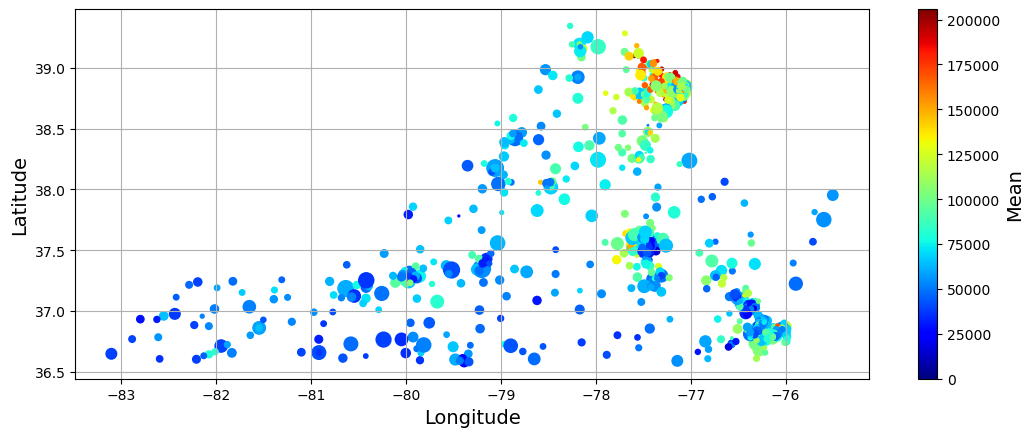

In [297]:
virginia.plot(kind="scatter", x="Lon", y="Lat", grid=True, s=virginia["sum_w"] / 15, c="Mean", cmap="jet", colorbar=True, figsize=(4.8 * (8 / 3), 4.8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Looking at this graph, the number of houses is represented by the size of the data point, and the average household income is represented by the color. We can see that the average household income seems to increase the more Northeast that you go. Let's plot all points that are above the average of the average household incomes, which is around $\$80,000$:

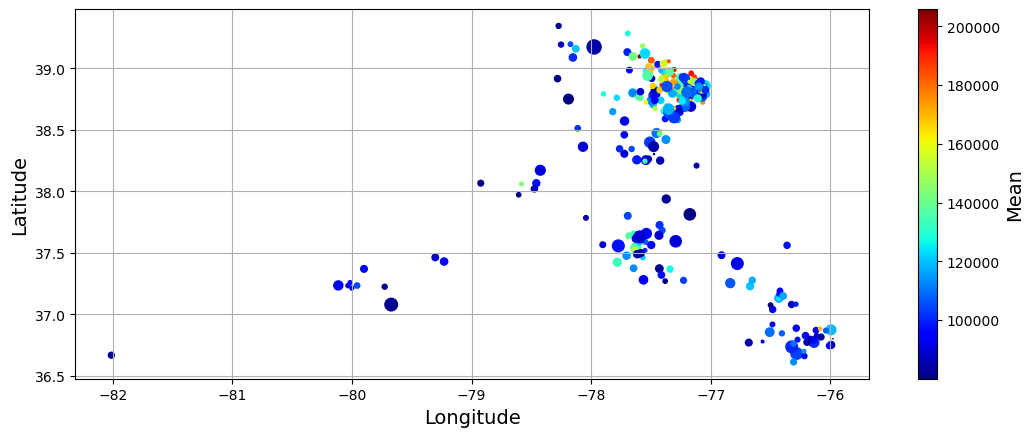

In [313]:
aboveMeans = virginia[virginia["Mean"] > virginia["Mean"].mean()]

aboveMeans.plot(kind="scatter", x="Lon", y="Lat", grid=True, s=aboveMeans["sum_w"] / 15, c="Mean", cmap="jet", colorbar=True, figsize=(4.8 * (8 / 3), 4.8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Unfortunately, this data set does not contain information about the population densities of these locations. However, a quick Google search shows that there are roughly $3$ people per household in Virginia, so let's estimate the population of Virginia:

In [316]:
int(round(sum(virginia["sum_w"] * 3), 0))

944295

This is about $\frac{1}{8}$ of the actual population, but the probabilities that we will calculate using this will not be too far from the truth.

Let's do some calculations now. Let's find the conditional probability of making more than the average household income given that you are living on the right side of the midline of Virginia:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

In [318]:
midLong = (virginia["Lon"].max() + virginia["Lon"].min()) / 2
midLong

-79.304703

In [329]:
rightSideVirginia = virginia[virginia["Lon"] > midLong]
aboveMeanRightSideVirginia = rightSideVirginia[rightSideVirginia["Mean"] > rightSideVirginia["Mean"].mean()]
probAGivenB = sum(aboveMeanRightSideVirginia["sum_w"]) / sum(rightSideVirginia["sum_w"])

print("{}%".format(round(probAGivenB * 100, 2)))

30.21%


This means that there are enough locations on the right side of Virginia making below average income to bring this probability down, even though the red-colored areas are making almost double the average household income.

Let's reverse our question now. What is the conditional probability that someone is living on the right side of the midline of Virginia given that their average household income is above the average? Let's finally use Bayes' Rule!

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

In [332]:
probA = sum(aboveMeans["sum_w"]) / sum(virginia["sum_w"])
probB = sum(rightSideVirginia["sum_w"]) / sum(virginia["sum_w"])
probBGivenA = (probAGivenB * probB) / probA

print("{}%".format(round(probBGivenA * 100, 2)))

84.33%


A *much* different answer came out. This shows that you'd have a much easier time guessing where someone lives based on their income, rather than guessing someone's income based on where they live.

Let's verify our answer using regular conditional probability, just to be sure that Bayes didn't lie to us:

$$P(B|A) = \frac{P(B \cap A)}{P(A)}$$

In [335]:
otherProbBGivenA = sum(aboveMeanRightSideVirginia["sum_w"]) / sum(aboveMeans["sum_w"])
print("{}%".format(round(otherProbBGivenA * 100, 2)))

84.33%


Sure enough, Bayes was right!